# IMPJ - Impala Platinum Holdings Ltd

In [2]:
from data_functions import *

I will be giving investment recommendations for the company IMPJ in this notebook with price predictions using an LSTM model. I will be predicting daily, weekly, and monthly prices for the year 2021 and giving investment recommendations using bollinger bands with the price predictions.

# Data Preparation

In [3]:
IMPJ = pd.read_csv('./Data/South Africa - Impala Platinum Holdings Ltd (IMPJ).csv')
IMPJ

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021","27,373","26,980","27,526","26,657",2.49M,1.77%
1,"Mar 30, 2021","26,898","26,766","27,443","26,360",3.02M,-0.30%
2,"Mar 29, 2021","26,980","27,800","28,174","26,614",4.44M,-2.01%
3,"Mar 26, 2021","27,533","27,083","28,006","26,728",3.36M,3.65%
4,"Mar 25, 2021","26,564","25,954","27,128","25,954",2.83M,2.55%
...,...,...,...,...,...,...,...
310,"Jan 07, 2020","14,500","14,688","14,688","13,940",3.94M,-0.82%
311,"Jan 06, 2020","14,620","14,985","15,045","14,574",2.61M,-1.50%
312,"Jan 03, 2020","14,843","14,700","14,884","14,360",3.19M,3.58%
313,"Jan 02, 2020","14,330","14,525","14,764","14,325",2.01M,-0.15%


In [4]:
IMPJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      315 non-null    object
 1   Price     315 non-null    object
 2   Open      315 non-null    object
 3   High      315 non-null    object
 4   Low       315 non-null    object
 5   Vol.      314 non-null    object
 6   Change %  314 non-null    object
dtypes: object(7)
memory usage: 17.4+ KB


In [5]:
## drop last row because it doesn't contain relevant information

IMPJ.drop(314, inplace=True)

In [6]:
## change date column to datetime

IMPJ['Date'] = pd.to_datetime(IMPJ['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

IMPJ['Price'] = IMPJ['Price'].str.replace(',', '').astype(float)
IMPJ['Open'] = IMPJ['Open'].str.replace(',', '').astype(float)
IMPJ['High'] = IMPJ['High'].str.replace(',', '').astype(float)
IMPJ['Low'] = IMPJ['Low'].str.replace(',', '').astype(float)

In [8]:
IMPJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      314 non-null    datetime64[ns]
 1   Price     314 non-null    float64       
 2   Open      314 non-null    float64       
 3   High      314 non-null    float64       
 4   Low       314 non-null    float64       
 5   Vol.      314 non-null    object        
 6   Change %  314 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 19.6+ KB


In [9]:
IMPJ.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
IMPJ

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,14330.0,14525.0,14764.0,14325.0,2.01M,-0.15%
1,2020-01-03,14843.0,14700.0,14884.0,14360.0,3.19M,3.58%
2,2020-01-06,14620.0,14985.0,15045.0,14574.0,2.61M,-1.50%
3,2020-01-07,14500.0,14688.0,14688.0,13940.0,3.94M,-0.82%
4,2020-01-08,15290.0,14775.0,15465.0,14468.0,6.24M,5.45%
...,...,...,...,...,...,...,...
309,2021-03-25,26564.0,25954.0,27128.0,25954.0,2.83M,2.55%
310,2021-03-26,27533.0,27083.0,28006.0,26728.0,3.36M,3.65%
311,2021-03-29,26980.0,27800.0,28174.0,26614.0,4.44M,-2.01%
312,2021-03-30,26898.0,26766.0,27443.0,26360.0,3.02M,-0.30%


In [10]:
## find rows for 2021 data

IMPJ.loc[IMPJ['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
252,2021-01-04,21629.0,20451.0,21629.0,20420.0,1.79M,7.13%
253,2021-01-05,20288.0,21575.0,21598.0,20147.0,3.36M,-6.20%
254,2021-01-06,20436.0,20650.0,21181.0,20290.0,3.00M,0.73%
255,2021-01-07,20400.0,20495.0,20982.0,20126.0,3.05M,-0.18%
256,2021-01-08,20644.0,20400.0,21039.0,19700.0,3.09M,1.20%
...,...,...,...,...,...,...,...
309,2021-03-25,26564.0,25954.0,27128.0,25954.0,2.83M,2.55%
310,2021-03-26,27533.0,27083.0,28006.0,26728.0,3.36M,3.65%
311,2021-03-29,26980.0,27800.0,28174.0,26614.0,4.44M,-2.01%
312,2021-03-30,26898.0,26766.0,27443.0,26360.0,3.02M,-0.30%


Because the length of 2021 data for IMPJ is 62, I will be putting the removing the first two dates of 2021 from the testing data and putting it into the training data. The reason for this is because we need a test dataset that is divisible by 5 for the weekly and monthly test data, so that we have a uniform shape in the test data set.

In [11]:
## split training data and testing data, testing data will be the year of 2021

training_data = IMPJ[['Date', 'Price']][:254]
testing_data = IMPJ[['Date', 'Price']][254:]

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(IMPJ[['Price']])
scaled_train_data = scaled_data[:254]

# Daily

In [21]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(IMPJ, testing_data, scaler, 14)

In [22]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [23]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [24]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.23296429216861725
Epoch  1 MSE:  0.08406570553779602
Epoch  2 MSE:  0.019405527040362358
Epoch  3 MSE:  0.04586237668991089
Epoch  4 MSE:  0.016508592292666435
Epoch  5 MSE:  0.024038268253207207
Epoch  6 MSE:  0.029851486906409264
Epoch  7 MSE:  0.028247272595763206
Epoch  8 MSE:  0.022570377215743065
Epoch  9 MSE:  0.01733832247555256
Epoch  10 MSE:  0.016428571194410324
Epoch  11 MSE:  0.01986169070005417
Epoch  12 MSE:  0.02182372845709324
Epoch  13 MSE:  0.019645769149065018
Epoch  14 MSE:  0.016692282631993294
Epoch  15 MSE:  0.015602709725499153
Epoch  16 MSE:  0.016221240162849426
Epoch  17 MSE:  0.01730099879205227
Epoch  18 MSE:  0.01785615272819996
Epoch  19 MSE:  0.017537977546453476
Epoch  20 MSE:  0.01655309647321701
Epoch  21 MSE:  0.01543566957116127
Epoch  22 MSE:  0.01475084200501442
Epoch  23 MSE:  0.014760670252144337
Epoch  24 MSE:  0.015202025882899761
Epoch  25 MSE:  0.015448740683495998
Epoch  26 MSE:  0.01507373247295618
Epoch  27 MSE:  0.01424

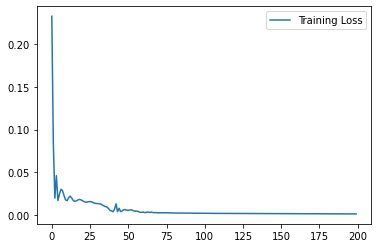

In [25]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [26]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 709.03 RMSE
Test Score: 629.33 RMSE


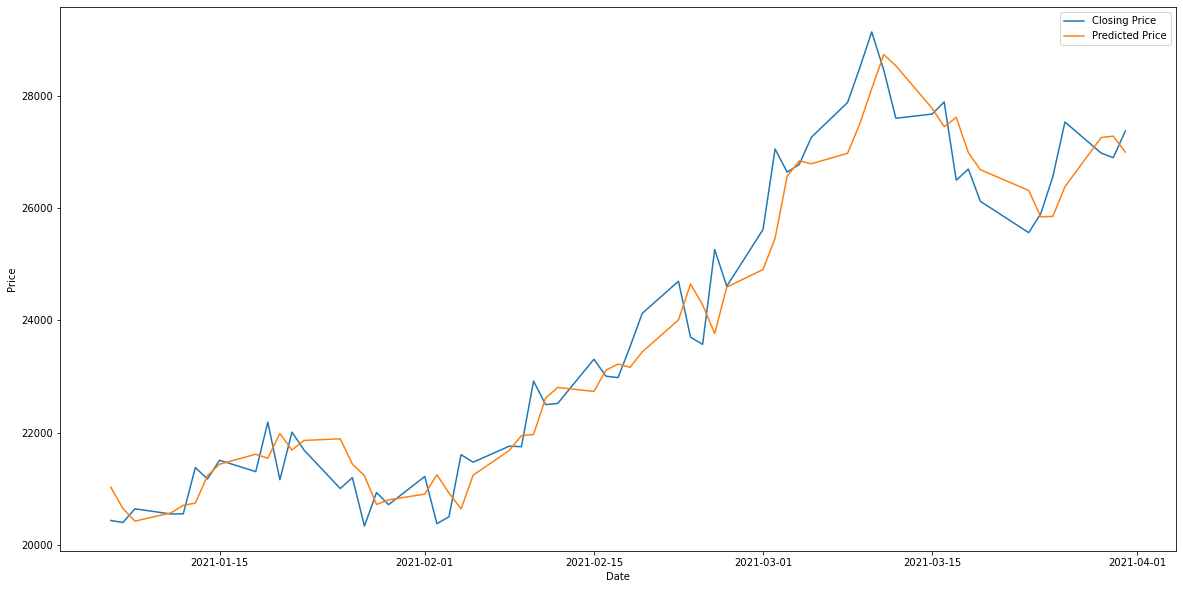

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The daily price predictions are very accurate. Let's see if we can make a profit with bollinger bands on this data.

In [34]:
boll_daily = IMPJ[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 15)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 15)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_17668/1689923814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_17668/1689923814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_17668/1689923814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,14330.000000,NaN,NaN,NaN
1,2020-01-03,14843.000000,NaN,NaN,NaN
2,2020-01-06,14620.000000,NaN,NaN,NaN
3,2020-01-07,14500.000000,NaN,NaN,NaN
4,2020-01-08,15290.000000,NaN,NaN,NaN
...,...,...,...,...,...
309,2021-03-25,25853.517578,27201.469792,28953.592194,25449.347390
310,2021-03-26,26381.244141,27170.796094,28965.529311,25376.062876
311,2021-03-29,27256.931641,27201.952865,28984.508666,25419.397063
312,2021-03-30,27281.208984,27222.348438,29000.784935,25443.911940


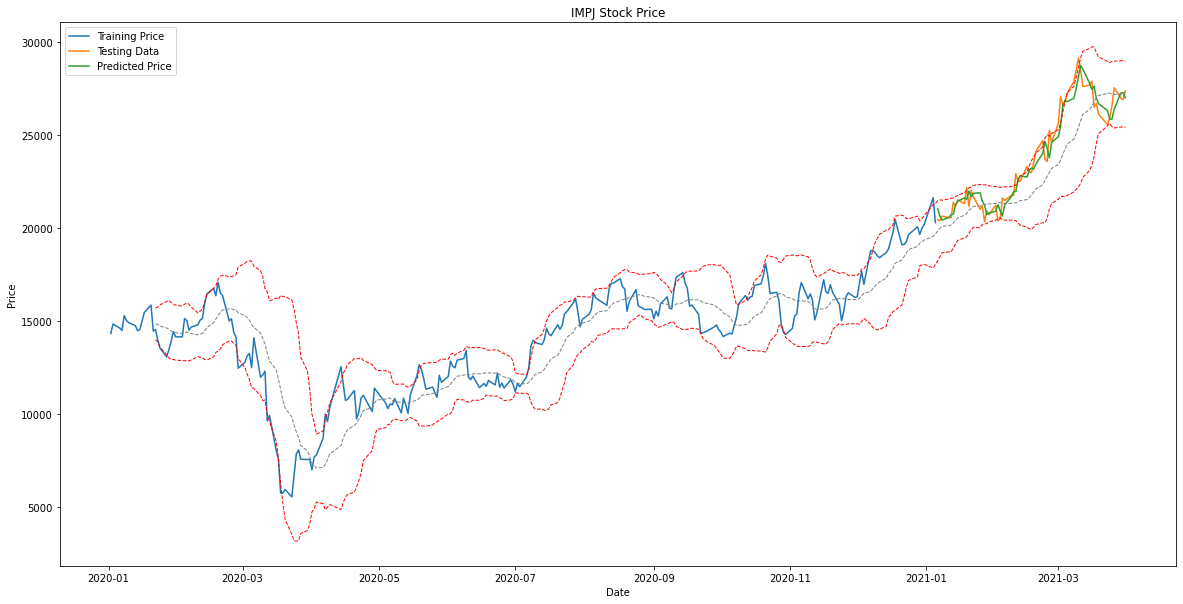

In [35]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IMPJ Stock Price')
plt.legend()
plt.show()

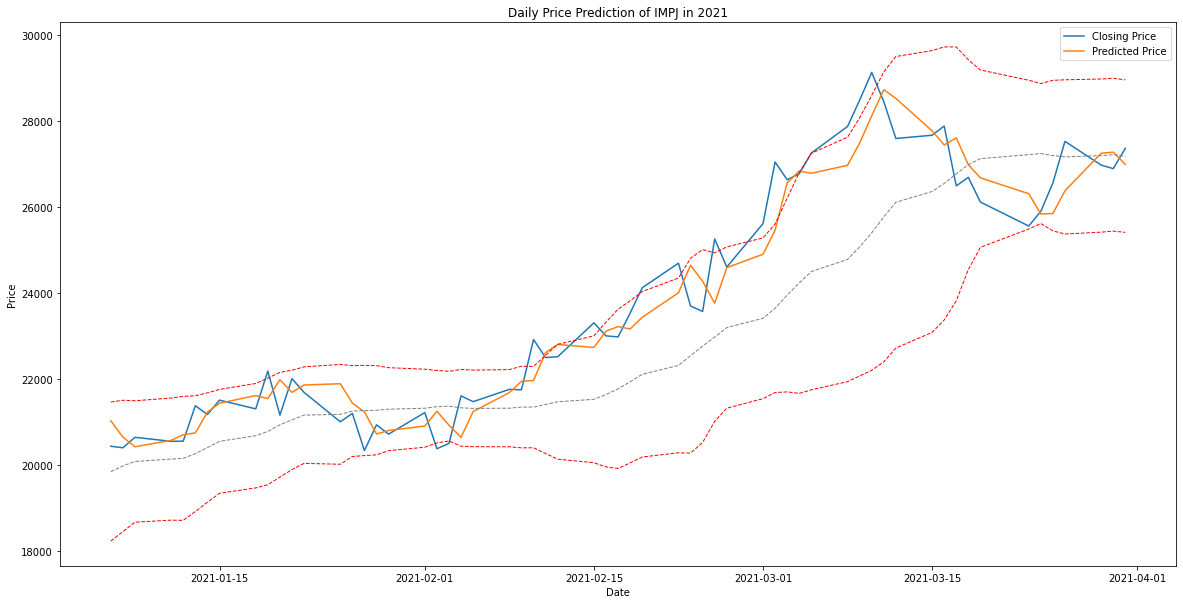

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][254:], boll_daily['upper_bb'][254:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][254:], boll_daily['lower_bb'][254:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][254:], boll_daily['SMA'][254:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of IMPJ in 2021')
plt.legend()
plt.show()

The investment strategy with bollinger bands is to buy when price hits the lower band and sell when price hits the upper band. Although the price does not hit or cross the lower band there are a couple areas it gets close that we can use as buying indicators and there are a couple selling indicators that we can use as well.

In [42]:
i_df = boll_daily[boll_daily['Date'] > '2021-01-05']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_17668/1947921595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
254,2021-01-06,21028.683594,19846.512240,21464.894108,18228.130372,20436.0
255,2021-01-07,20648.791016,19978.164974,21506.557144,18449.772804,20400.0
256,2021-01-08,20424.011719,20081.699089,21494.711528,18668.686649,20644.0
257,2021-01-11,20572.582031,20136.871224,21558.143778,18715.598670,20550.0
258,2021-01-12,20705.406250,20154.098307,21597.571845,18710.624769,20555.0
259,2021-01-13,20745.958984,20263.895573,21610.732133,18917.059013,21379.0
260,2021-01-14,21232.535156,20404.931250,21678.107007,19131.755493,21175.0
261,2021-01-15,21437.935547,20550.126953,21758.835970,19341.417937,21509.0
262,2021-01-18,21615.992188,20681.526432,21897.050746,19466.002118,21306.0
263,2021-01-19,21545.263672,20780.277344,22021.207264,19539.347423,22186.0


In [38]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price


In [49]:
i_df.iloc[[21]]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
275,2021-02-04,20643.330078,21329.968099,22222.371861,20437.564337,21608.0


In [50]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
280,2021-02-11,22616.357422,21408.985026,22551.891569,20266.078483,22500.0
294,2021-03-03,26567.246094,23954.804036,26208.276672,21701.331401,26640.0
295,2021-03-04,26841.349609,24236.470182,26806.859533,21666.080831,26778.0


In [56]:
i_df.sort_values('Price', ascending=False).head(1)

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
300,2021-03-11,28735.429688,25775.165625,29150.33099,22400.00026,28457.0


The buying indicator I will use is when the predicted price gets really close to the lower bollinger band on 02-04-2021 with a closing price of \\$21608. The selling indicator I will use, like the buying indicator, is when the price does not hit the upper bollinger band but gets really close at the highest predicted price. This is on 03-11-2021 with a closing price of \\$28457. This results in a profit of 31.7%.

## Weekly

In [34]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [35]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 19)
X_test_w, y_test_w = get_weekly_test_data(IMPJ, testing_data, scaler, 19)

In [36]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [37]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.17084315419197083
Epoch  1 MSE:  0.09089378267526627
Epoch  2 MSE:  0.020606372505426407
Epoch  3 MSE:  0.17900042235851288
Epoch  4 MSE:  0.016856985166668892
Epoch  5 MSE:  0.038714148104190826
Epoch  6 MSE:  0.055312030017375946
Epoch  7 MSE:  0.05851462110877037
Epoch  8 MSE:  0.05428454652428627
Epoch  9 MSE:  0.04623217135667801
Epoch  10 MSE:  0.0366503931581974
Epoch  11 MSE:  0.027464022859930992
Epoch  12 MSE:  0.020627079531550407
Epoch  13 MSE:  0.017910534515976906
Epoch  14 MSE:  0.01976769231259823
Epoch  15 MSE:  0.023403309285640717
Epoch  16 MSE:  0.024921242147684097
Epoch  17 MSE:  0.023658432066440582
Epoch  18 MSE:  0.021219270303845406
Epoch  19 MSE:  0.019130857661366463
Epoch  20 MSE:  0.017997287213802338
Epoch  21 MSE:  0.017740309238433838
Epoch  22 MSE:  0.018017109483480453
Epoch  23 MSE:  0.018477873876690865
Epoch  24 MSE:  0.018869278952479362
Epoch  25 MSE:  0.01905420795083046
Epoch  26 MSE:  0.018996326252818108
Epoch  27 MSE:  0.018

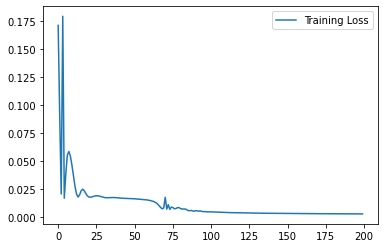

In [38]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [39]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14365.28 RMSE
Test Score: 22545.98 RMSE


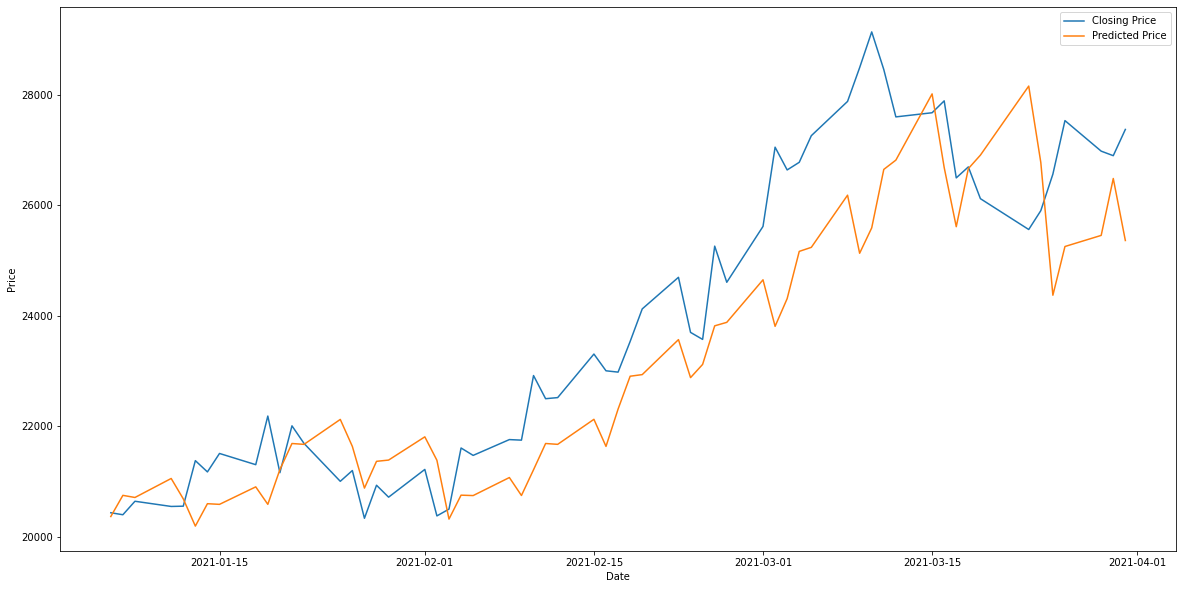

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The weekly price predictions are also pretty accurate, however there are wild price fluctuations in the predictions.

In [41]:
boll_weekly = IMPJ[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 15)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_22784/761916716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_22784/761916716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_22784/761916716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,14330.000000,NaN,NaN,NaN
1,2020-01-03,14843.000000,NaN,NaN,NaN
2,2020-01-06,14620.000000,NaN,NaN,NaN
3,2020-01-07,14500.000000,NaN,NaN,NaN
4,2020-01-08,15290.000000,NaN,NaN,NaN
...,...,...,...,...,...
309,2021-03-25,24372.750000,26264.736719,28410.994430,24118.479007
310,2021-03-26,25254.410156,26270.624609,28404.413772,24136.835447
311,2021-03-29,25455.386719,26285.040365,28391.713653,24178.367076
312,2021-03-30,26485.042969,26305.163932,28413.433790,24196.894075


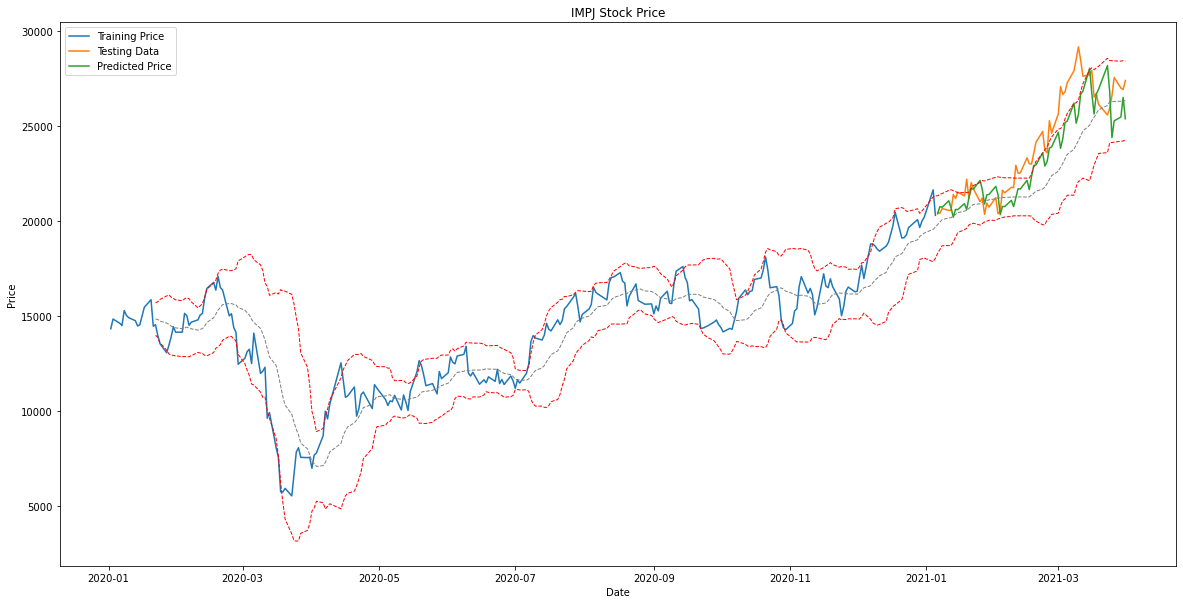

In [42]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IMPJ Stock Price')
plt.legend()
plt.show()

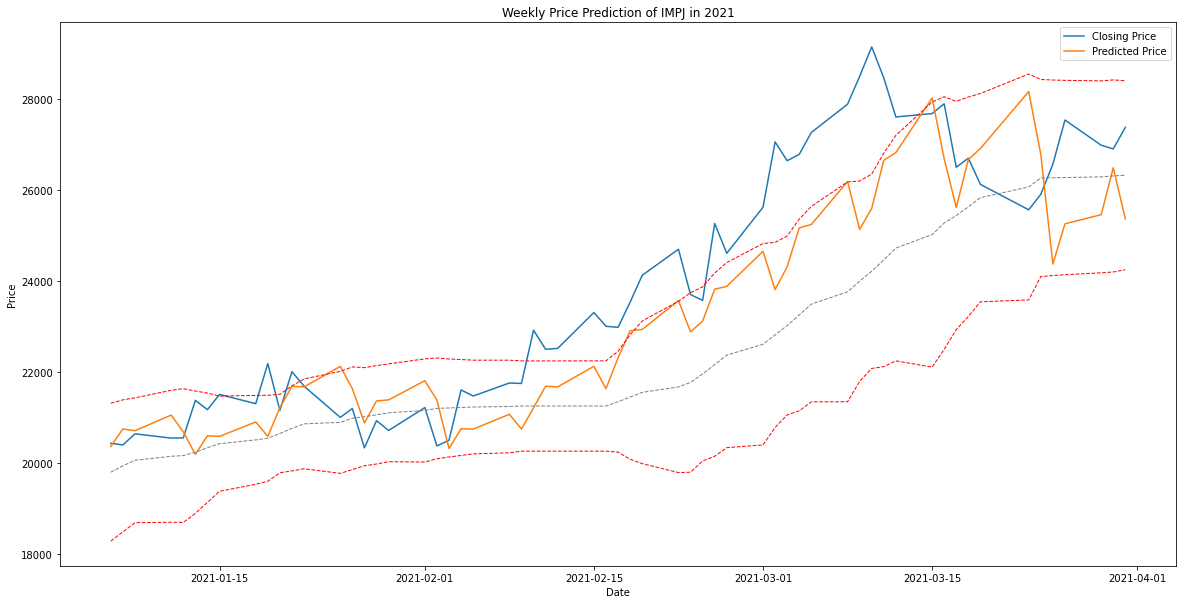

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][254:], boll_weekly['upper_bb'][254:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][254:], boll_weekly['lower_bb'][254:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][254:], boll_weekly['SMA'][254:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of IMPJ in 2021')
plt.legend()
plt.show()

Like the daily data, there is no point when price hits the lower band but there are a couple places we can use as buying indicators when the price gets close to the lower band. There are multiple selling indicators that we can use.

In [44]:
i_df = boll_weekly[boll_weekly['Date'] > '2021-01-05']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_22784/3831566588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
254,2021-01-06,20367.808594,19802.453906,21315.460683,18289.447129,20436.0
255,2021-01-07,20750.833984,19940.909505,21390.109337,18491.709673,20400.0
256,2021-01-08,20712.406250,20063.669922,21434.288095,18693.051749,20644.0
257,2021-01-11,21056.189453,20151.082552,21599.629568,18702.535537,20550.0
258,2021-01-12,20687.658203,20167.126432,21634.923109,18699.329755,20555.0
259,2021-01-13,20194.572266,20240.164583,21583.968930,18896.360237,21379.0
260,2021-01-14,20599.748047,20339.014453,21539.201053,19138.827853,21175.0
261,2021-01-15,20587.931641,20427.543229,21472.489567,19382.596891,21509.0
262,2021-01-18,20904.375000,20511.501563,21487.053359,19535.949766,21306.0
263,2021-01-19,20588.255859,20546.451953,21490.344381,19602.559525,22186.0


In [45]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price


In [46]:
i_df[i_df['Date'] == '2021-02-03']

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
274,2021-02-03,20321.078125,21211.748828,22287.133676,20136.36398,20502.0


In [47]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
267,2021-01-25,22125.000000,20896.193099,22016.080069,19776.306128,21005.0
285,2021-02-18,22906.818359,21452.542318,22820.062796,20085.021840,23536.0
287,2021-02-22,23569.279297,21672.960677,23552.652359,19793.268995,24697.0
297,2021-03-08,26183.189453,23761.622396,26175.020781,21348.224011,27880.0
302,2021-03-15,28016.357422,25018.039714,27928.548596,22107.530831,27675.0


The buying indicator I'll be using is when the predicted price gets closest to the lower bollinger band on 02-03-2021 with a closing price of \\$20502. The selling indicator I'll be using is when the predicted price is the highest on 03-15-2021 with a closing price of \\$27675. This results in a profit of 35%.

# Monthly

In [123]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [124]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 54)
X_test_m, y_test_m = get_monthly_test_data(IMPJ, testing_data, scaler, 54)

In [125]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [126]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.16815395653247833
Epoch  1 MSE:  0.12299224734306335
Epoch  2 MSE:  0.06629286706447601
Epoch  3 MSE:  0.08548519760370255
Epoch  4 MSE:  0.02664213813841343
Epoch  5 MSE:  0.025282973423600197
Epoch  6 MSE:  0.028166305273771286
Epoch  7 MSE:  0.026436999440193176
Epoch  8 MSE:  0.02523391880095005
Epoch  9 MSE:  0.026478266343474388
Epoch  10 MSE:  0.026353979483246803
Epoch  11 MSE:  0.024094970896840096
Epoch  12 MSE:  0.02182622440159321
Epoch  13 MSE:  0.0205850787460804
Epoch  14 MSE:  0.020131399855017662
Epoch  15 MSE:  0.019925422966480255
Epoch  16 MSE:  0.019630704075098038
Epoch  17 MSE:  0.01919192634522915
Epoch  18 MSE:  0.018737440928816795
Epoch  19 MSE:  0.018430769443511963
Epoch  20 MSE:  0.018337000161409378
Epoch  21 MSE:  0.01836668886244297
Epoch  22 MSE:  0.01833942160010338
Epoch  23 MSE:  0.01812385953962803
Epoch  24 MSE:  0.017732152715325356
Epoch  25 MSE:  0.017289232462644577
Epoch  26 MSE:  0.016918756067752838
Epoch  27 MSE:  0.016645

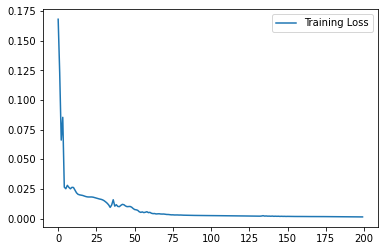

In [127]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [128]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14336.19 RMSE
Test Score: 23074.29 RMSE


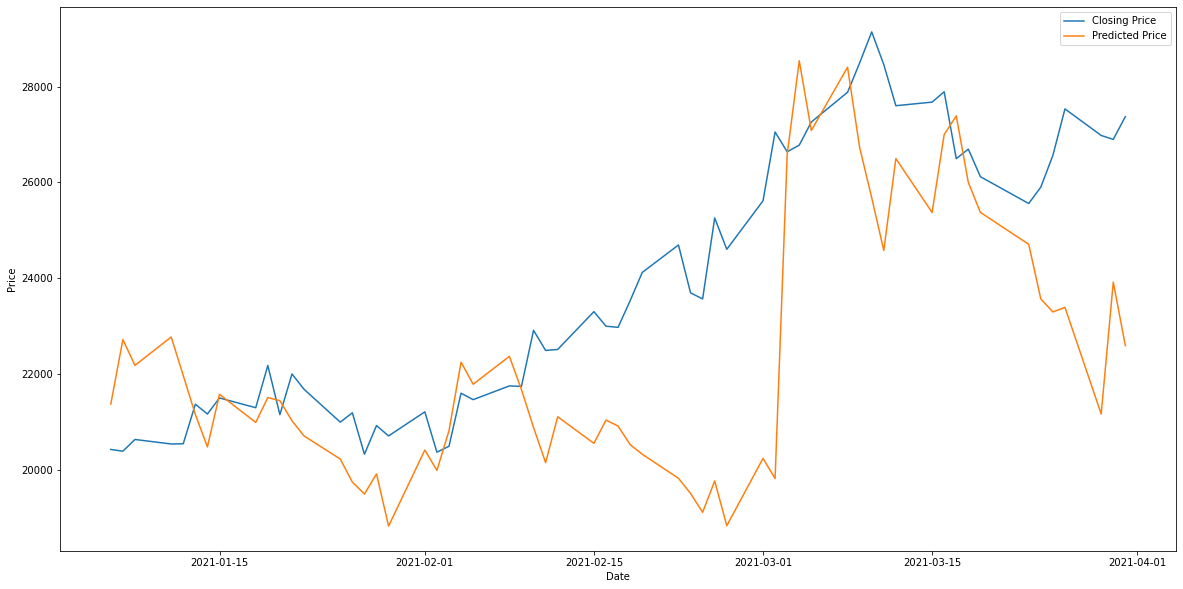

In [129]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The monthly predicted prices somewhat capture the overall trend of the closing price but the predictions fluctuate wildly in March. Let's see if we can turn a profit using this data.

In [130]:
boll_monthly = IMPJ[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 20)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_17668/1219975179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_17668/1219975179.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_17668/1219975179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,14330.000000,NaN,NaN,NaN
1,2020-01-03,14843.000000,NaN,NaN,NaN
2,2020-01-06,14620.000000,NaN,NaN,NaN
3,2020-01-07,14500.000000,NaN,NaN,NaN
4,2020-01-08,15290.000000,NaN,NaN,NaN
...,...,...,...,...,...
309,2021-03-25,23301.718750,24776.090137,30690.897511,18861.282762
310,2021-03-26,23397.941406,24956.967285,30433.549438,19480.385133
311,2021-03-29,21174.861328,25073.376758,30082.087371,20064.666145
312,2021-03-30,23923.179688,25257.055469,29765.376220,20748.734717


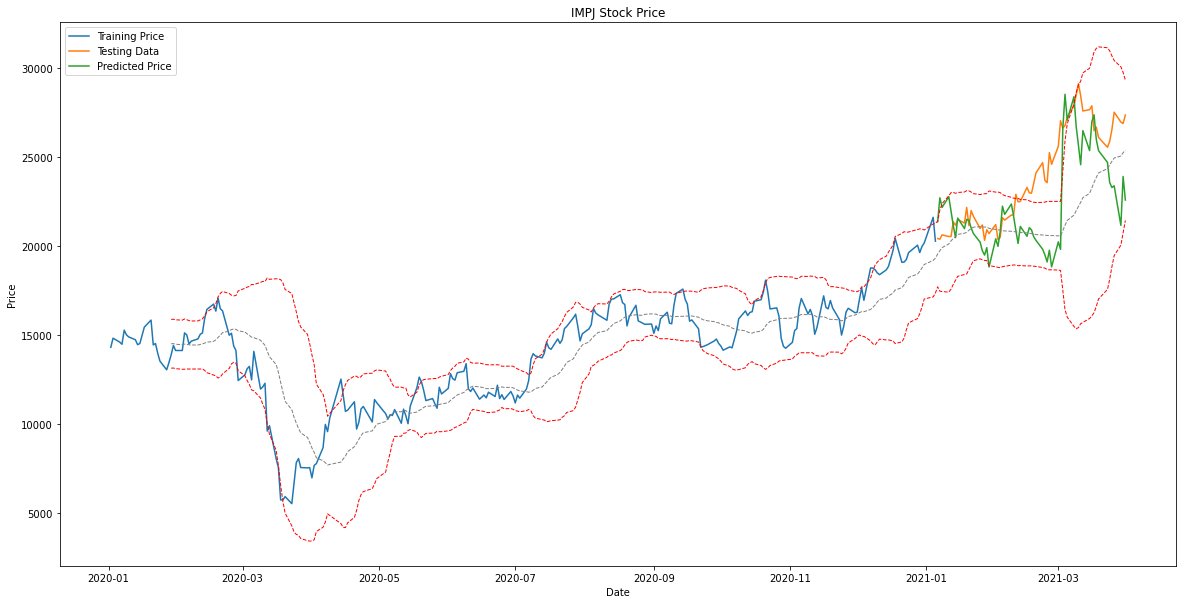

In [131]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IMPJ Stock Price')
plt.legend()
plt.show()

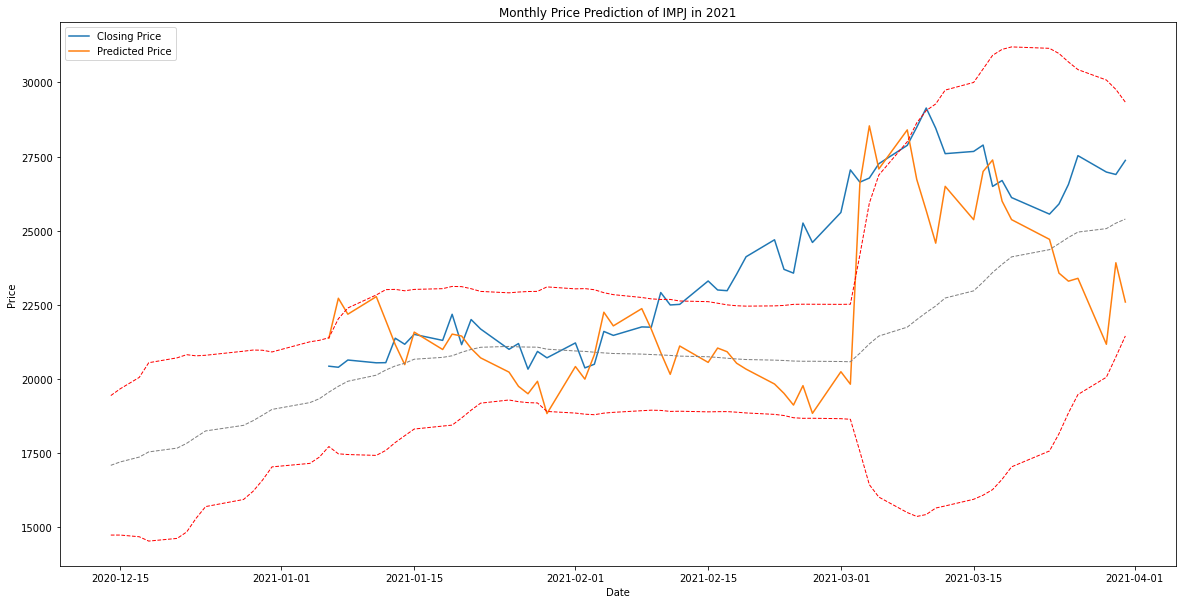

In [132]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][254:], boll_monthly['upper_bb'][254:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][254:], boll_monthly['lower_bb'][254:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][254:], boll_monthly['SMA'][254:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of IMPJ in 2021')
plt.legend()
plt.show()

In [133]:
i_df = boll_monthly[boll_monthly['Date'] > '2021-01-05']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_17668/375764974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
254,2021-01-06,21383.312500,19560.965625,21394.725973,17727.205277,20436.0
255,2021-01-07,22725.734375,19758.102344,22034.109412,17482.095275,20400.0
256,2021-01-08,22188.445312,19928.424609,22398.437885,17458.411334,20644.0
257,2021-01-11,22780.130859,20133.131152,22837.128223,17429.134081,20550.0
258,2021-01-12,21976.560547,20306.509180,23016.697827,17596.320533,20555.0
259,2021-01-13,21164.689453,20444.393652,23025.190249,17863.597056,21379.0
260,2021-01-14,20488.292969,20535.108301,22977.733209,18092.483392,21175.0
261,2021-01-15,21585.013672,20670.808984,23024.092444,18317.525525,21509.0
262,2021-01-18,20998.697266,20733.493848,23049.435400,18417.552295,21306.0
263,2021-01-19,21517.107422,20786.999219,23124.417726,18449.580712,22186.0


In [134]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
271,2021-01-29,18838.886719,21009.633008,23108.726487,18910.539529,20718.0


In [135]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
255,2021-01-07,22725.734375,19758.102344,22034.109412,17482.095275,20400.0
294,2021-03-03,26577.708984,20872.829590,24183.372963,17562.286217,26640.0
295,2021-03-04,28536.990234,21186.920117,25931.201377,16442.638858,26778.0
296,2021-03-05,27084.060547,21451.378809,26878.830397,16023.927220,27260.0
297,2021-03-08,28401.132812,21752.613574,28002.672025,15502.555124,27880.0


The buying indicator I'll use is on 01-29-2021 with a closing price of \\$20718. The selling indicator I'll use is when the price crosses the upper bollinger band the second time because the predicted price stays elevated for a couple days. This is on 03-08-2021 with a closing price of \\$27880. This results in a profit of 34.6%.

Even though the monthly predictions were somewhat inaccurate, because the price of the stock consistently rose throughout the first quarter it was relatively easy to make a profit with this stock.

# Conclusion

Using price predictions with an LSTM model on PAMP, I was able to consistently make a profit using bollinger bands on the price predictions. The best performance was on the weekly price predictions with a 35% profit. 

I was also able to make a profit using the daily and monthly price predictions. The daily price predictions have a 31.7% profit and the monthly price predictions have a 34.6% profit.

I would recommend an investment strategy using the indicators given by the weekly price predictions. Using this investment strategy leads to a profit of 35%.